# Lab 2: Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
%matplotlib inline

df = pd.read_csv('bank.csv')
df.tail()
df_original = df

# Process and Encode the Categorical Features

In [2]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','subscribed']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,8,2,3,0,2785,0,0,0,16,11,327,2,-1,0,3,1
1996,28.0,0,2,1,0,127,0,0,0,16,11,1334,2,-1,0,3,1
1997,81.0,5,1,0,0,1154,0,0,1,17,11,231,1,-1,0,3,1
1998,46.0,7,1,0,0,4343,1,0,2,20,11,185,1,-1,0,3,1
1999,40.0,2,1,1,0,6403,0,0,0,22,11,208,2,-1,0,3,1


# Treatment of Missing Values in Numerical Columns

In [3]:
# Fill in missing values with mean 
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])
df['balance'] = imputer.fit_transform(df[['balance']])
df['duration'] = imputer.fit_transform(df[['duration']])
df['campaign'] = imputer.fit_transform(df[['campaign']])
df['pdays'] = imputer.fit_transform(df[['pdays']])
df['previous'] = imputer.fit_transform(df[['previous']])
df['job'] = imputer.fit_transform(df[['job']])
df['education'] = imputer.fit_transform(df[['education']])
df['contact'] = imputer.fit_transform(df[['contact']])
df['poutcome'] = imputer.fit_transform(df[['poutcome']])

In [4]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,8.0,2,3.0,0,2785.0,0,0,0.0,16,11,327.0,2.0,-1.0,0.0,3.0,1
1996,28.0,0.0,2,1.0,0,127.0,0,0,0.0,16,11,1334.0,2.0,-1.0,0.0,3.0,1
1997,81.0,5.0,1,0.0,0,1154.0,0,0,1.0,17,11,231.0,1.0,-1.0,0.0,3.0,1
1998,46.0,7.0,1,0.0,0,4343.0,1,0,2.0,20,11,185.0,1.0,-1.0,0.0,3.0,1
1999,40.0,2.0,1,1.0,0,6403.0,0,0,0.0,22,11,208.0,2.0,-1.0,0.0,3.0,1


# Rescaling Features

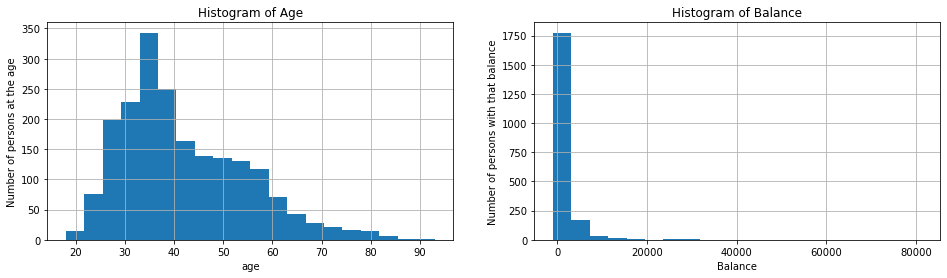

In [6]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of persons at the age')
df['age'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Balance")
ax3.set_xlabel('Balance')
ax3.set_ylabel('Number of persons with that balance')
df['balance'].hist(bins=20)

plt.show()

In [7]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [9]:
df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].min()

age        -1.872833
balance    -0.764641
day        -1.323565
duration   -1.286763
campaign   -0.659767
pdays      -1.282224
previous   -0.753408
dtype: float64

In [10]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

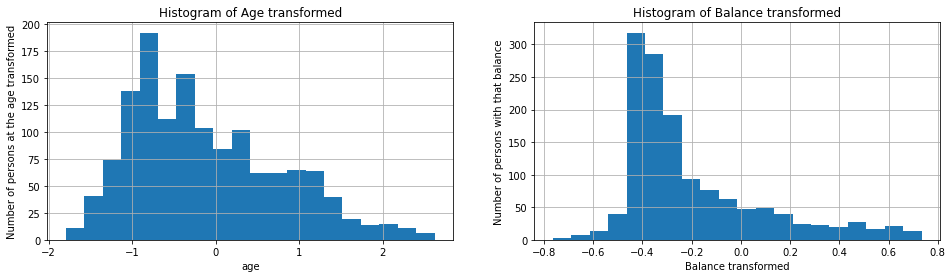

In [11]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age transformed")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of persons at the age transformed')
df['age'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Balance transformed")
ax3.set_xlabel('Balance transformed')
ax3.set_ylabel('Number of persons with that balance')
df['balance'].hist(bins=20)

plt.show()

# Creation of Derived Features

In [12]:
df['total_contact'] = df['campaign'] + df['previous']

In [19]:
df['Been divorced'] = df['marital'].apply(lambda x: 0 if x <= 1 else 1)

In [20]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,total_contact,OAP(old-age pensioner),Been divorced
1990,-0.453603,9.0,1,2.0,0,-0.331475,0,0,0.0,0.221272,11,-0.537334,-0.659767,-1.282224,-0.753408,3.0,1,-1.413175,0,0
1991,-0.217065,0.0,0,1.0,0,-0.415808,0,0,0.0,0.221272,11,1.273034,0.791067,-1.282224,-0.753408,3.0,1,0.037660,0,0
1993,-0.532449,4.0,1,3.0,0,0.291440,1,1,0.0,0.221272,11,0.121803,-0.659767,-1.282224,-0.753408,3.0,1,-1.413175,0,0
1994,-1.242064,8.0,2,1.0,0,-0.242350,0,0,0.0,0.221272,11,-0.460585,-0.659767,-1.282224,-0.753408,3.0,1,-1.413175,0,1
1995,-1.715141,8.0,2,3.0,0,0.438065,0,0,0.0,0.221272,11,0.157920,0.065650,-1.282224,-0.753408,3.0,1,-0.687758,0,1


# Save the Prepared Dataset

In [15]:
df.to_csv('prepared_bank.csv', index=False)